# Introduction to data science: classification

You know about the _data_ side of **data science**, now we can find out about the _science_ :)

Data science depends hugely on data, but the _science_ part requires us to select the best (i.e. optimal) model -- and this means having an objective measure of 'best' and a way to prove that you have found it.

In this notebook, we will predict the **lithology** (a fancy name for rock type) from two physical measurements: P-wave velocity (Vp) and bulk density (rho). We will fit a **support vector machine**, a versatile learning algorithm.

First we'll import some data. I'm using an extract from the Rock Property Catalog, https://github.com/scienxlab/datasets/tree/main/rpc

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/scienxlab/datasets/refs/heads/main/rpc/3-lithologies.csv'

df = pd.read_csv(url)

df.head()

,RPC,Description,Lithology,Vp,Vs,Rho
0,101023,Gray Shale,shale,4953.66,2957.26,2.71
1,100978,Olentangy Shale,shale,3444.66,2318.00,2.68
2,100993,Brown Gas Shale,shale,3507.80,2218.53,2.56
3,101048,Shale 2 (Density is assumed constant),shale,2988.89,1633.33,2.60
4,100417,Tight gas shale,shale,3642.00,2221.00,2.46


In [2]:
df.describe()

,RPC,Vp,Vs,Rho
count,440.000000,440.000000,440.000000,428.000000
mean,101420.745455,4241.400318,2404.569500,2.471659
std,817.462173,1017.116305,623.491734,0.168290
min,100031.000000,1490.710000,839.570000,1.770000
25%,100831.750000,3444.245000,2008.362500,2.387500
50%,101589.000000,4396.045000,2559.060000,2.510000
75%,102179.250000,5150.920000,2858.630000,2.570000
max,102855.000000,5940.000000,3477.690000,2.780000


In [3]:
df = df.dropna()

In [4]:
features = ['Vp', 'Rho']
target = 'Lithology'

X = df[features].values
y = df[target].values

In [5]:
X

array([[4.95366e+03, 2.71000e+00],
       [3.44466e+03, 2.68000e+00],
       [3.50780e+03, 2.56000e+00],
       [2.98889e+03, 2.60000e+00],
       [3.64200e+03, 2.46000e+00],
       [4.98707e+03, 2.71000e+00],
       [4.39576e+03, 2.51000e+00],
       [3.81902e+03, 2.63000e+00],
       [3.03333e+03, 2.60000e+00],
       [2.40274e+03, 2.35000e+00],
       [2.20200e+03, 2.25000e+00],
       [3.89310e+03, 2.56000e+00],
       [2.50912e+03, 2.35000e+00],
       [3.54500e+03, 2.50000e+00],
       [3.72675e+03, 2.60000e+00],
       [3.75062e+03, 2.68000e+00],
       [3.96598e+03, 2.63000e+00],
       [5.25846e+03, 2.55000e+00],
       [3.66900e+03, 2.59000e+00],
       [4.40883e+03, 2.60000e+00],
       [3.04800e+03, 2.42000e+00],
       [1.49071e+03, 2.30000e+00],
       [5.19100e+03, 2.78000e+00],
       [4.40400e+03, 2.31000e+00],
       [3.85000e+03, 2.48000e+00],
       [3.23807e+03, 2.68000e+00],
       [4.72278e+03, 2.56000e+00],
       [3.78717e+03, 2.51000e+00],
       [4.48463e+03,

A plot is usually the best way to meet the data.

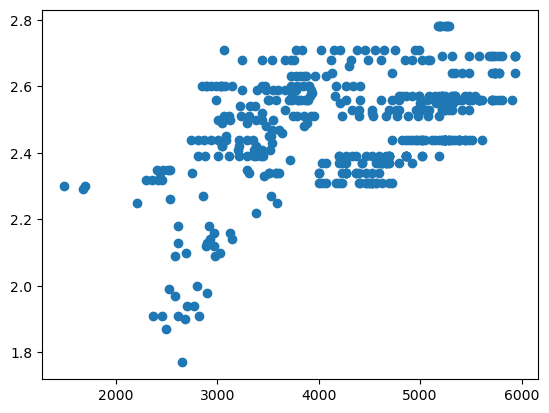

In [6]:
import matplotlib.pyplot as plt

plt.scatter(*X.T)

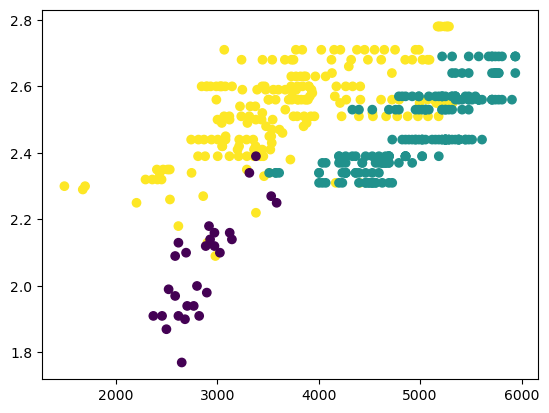

In [7]:
LITHS = ['limestone', 'dolomite', 'shale']

def lith_index(y):
    return [LITHS.index(lith) for lith in y]

plt.scatter(*X.T, c=lith_index(y))

## A linear model: SVM


The **support vector machine** is a reliable classifier.

In [8]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

svc.fit(X, y)

y_pred = svc.predict(X)

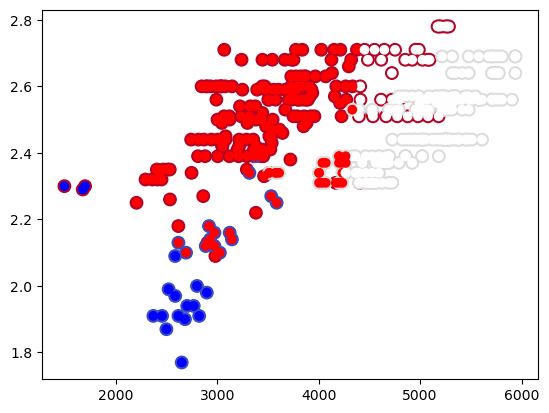

In [9]:
plt.scatter(*X.T, c=lith_index(y), s=80, cmap='coolwarm')
plt.scatter(*X.T, c=lith_index(y_pred), cmap='bwr')

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.8060747663551402

**❓ What do we think? Are we satisfied?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

## Scoring

Scores matter in all machine learning tasks. It is very common to see people reporting only **accuracy** for classification tasks, or only **R<sup>2</sup>** for regression tasks. It is almost never enough to only look at (or report) the 'obvious' score -- especially for multiclass problems like this one, and especially when there is class imbalance.

**This is one of the most important review papers in all of machine learning: [Raschka 2018](https://arxiv.org/abs/1811.12808). Read it and share it.**

### Confusion matrix

This matrix, and the associated display, are a common way to look at the performance of the estimator.

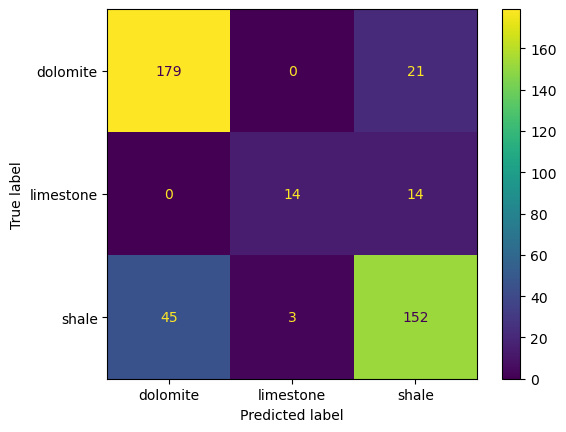

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svc, X, y)

It's worth spending some time to understanding what the matrix is telling you. Think about true predictions, false positives, and false negatives.

### Classification report

This report summarizes some of the information contained in the confusion matrix:

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

    dolomite       0.80      0.90      0.84       200
   limestone       0.82      0.50      0.62        28
       shale       0.81      0.76      0.79       200

    accuracy                           0.81       428
   macro avg       0.81      0.72      0.75       428
weighted avg       0.81      0.81      0.80       428



💡 It's worth taking a look at exactly what **precision**, **recall**, **f1**, **macro** and **weighted** (formerly **micro**) mean.

## Validation

We should not train the model then check its accuracy only on that same training dataset. It's cheating.

Let's hold out some validation data, or 'blind' data.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((321, 2), (321,), (107, 2), (107,))

### EXERCISE

Now let's train a model _on only the training data_ and validate it properly _on only the test data_.

**❓ Do we think the score will be better or worse than before?**

In [14]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.80      0.87      0.84        47
   limestone       1.00      0.75      0.86         4
       shale       0.87      0.82      0.84        56

    accuracy                           0.84       107
   macro avg       0.89      0.81      0.85       107
weighted avg       0.84      0.84      0.84       107



We need to think about:

- **Independence** — can you shuffle the data wthout losing information?
- **Identical distributions** — are all the data from the same distribution?
- **Reproducibility** — what can we do to make this reproducible?
- **Stratification** — How can we deal with class imbalance?

Can you demonstrate that the test sample is fair and reproducible?

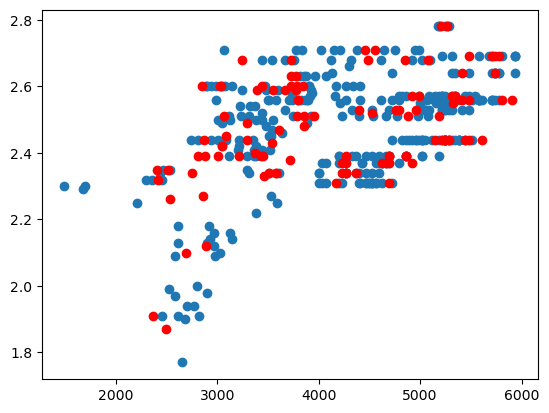

In [15]:
plt.scatter(*X_train.T)
plt.scatter(*X_test.T, c='red')

<Axes: ylabel='Density'>

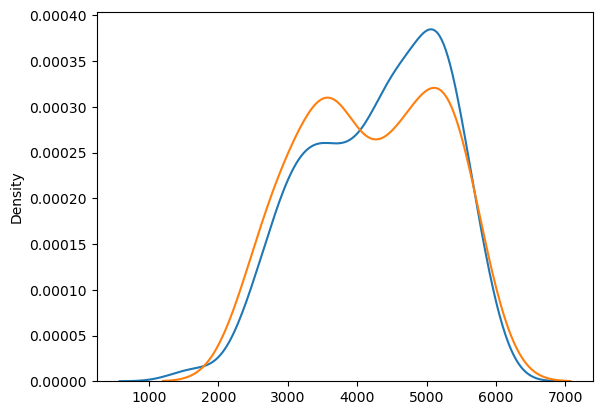

In [16]:
import seaborn as sns

sns.kdeplot(X_train[:, 0])
sns.kdeplot(X_test[:, 0])

## A non-linear SVM model

If we employ the **kernel trick** we can fit a nonlinear model. Scikit-learn's `SVC` actually uses this by default:

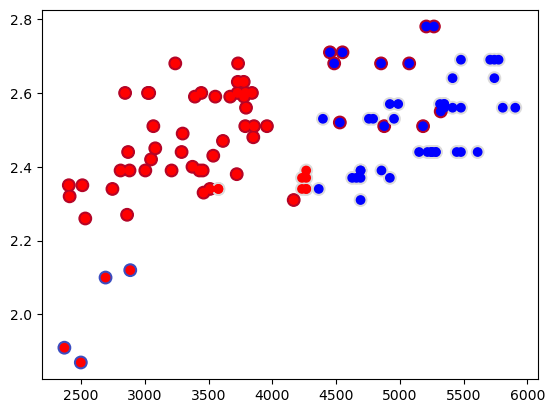

In [17]:
svc = SVC()  # Default is kernel='rbf'

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

plt.scatter(*X_test.T, c=lith_index(y_test), s=80, cmap='coolwarm')
plt.scatter(*X_test.T, c=lith_index(y_pred), cmap='bwr')

The score is muuuuuuuuuuuch worse, especially for the minority class:

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.78      0.83      0.80        47
   limestone       0.00      0.00      0.00         4
       shale       0.79      0.80      0.80        56

    accuracy                           0.79       107
   macro avg       0.52      0.54      0.53       107
weighted avg       0.76      0.79      0.77       107



/Users/MTHA/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/MTHA/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/MTHA/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

**❓ What could the problem be?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

### Scale matters

We are not looking at the data in its 'true' numerically isotropic space:

(1268.3295, 6160.7005, 1.7195, 2.8305)

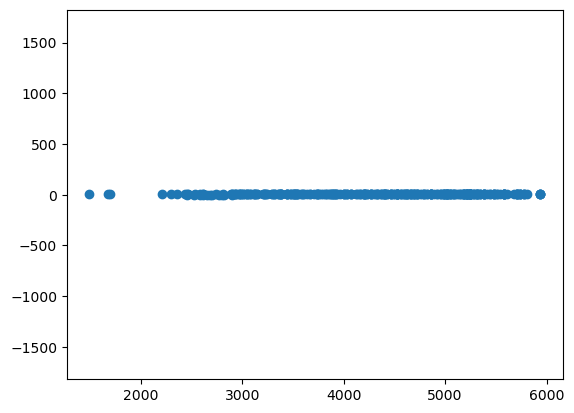

In [19]:
plt.scatter(*X_train.T)
plt.axis('equal')

## Standardize the data

It's essential to train SVMs on scaled data, usually the Z-scores of your data, i.e. zero mean, unit variance. This ensures that the different scales of the features is not causing a problem.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

This doesn't change how the data are relatively distributed:

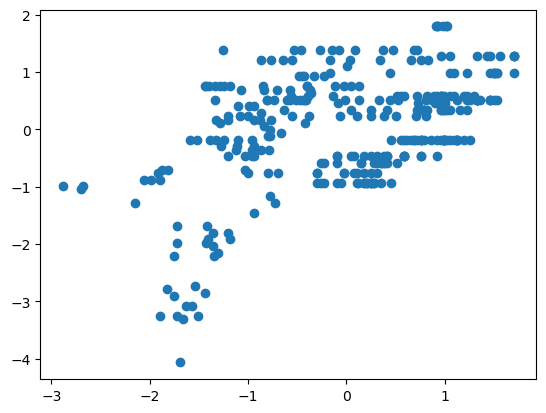

In [21]:
plt.scatter(*X_train_sc.T)

But it dramatically changes how they are distributed in absolute terms:

<Axes: ylabel='Density'>

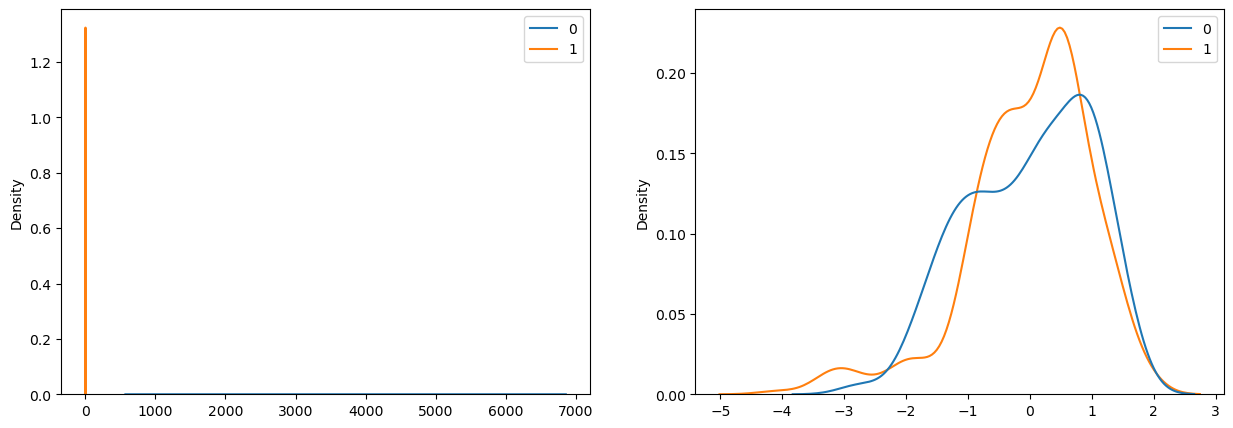

In [22]:
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.kdeplot(X_train, ax=axs[0])
sns.kdeplot(X_train_sc, ax=axs[1])

### EXERCISE

Re-fit the **linear** model and look at the scores.

In [23]:
svc = SVC(kernel='linear')

svc.fit(X_train_sc, y_train)

y_pred = svc.predict(X_test_sc)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.90      0.94      0.92        47
   limestone       1.00      1.00      1.00         4
       shale       0.94      0.91      0.93        56

    accuracy                           0.93       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.93      0.93      0.93       107



Solving one problem gives us a new one. Now we have a new pitfall: it is essential to scale the data now before inference -- although the model will happily make (terrible) predictions.

In [24]:
svc.predict([[2300, 2.3]]), svc.predict([[-2300, 2.3e9]])

(array(['dolomite'], dtype=object), array(['shale'], dtype=object))

This is known as an "out of distribution" or OOD error, and it's a classic pitfall in machine learning.

## Put everything in a pipeline

This is the most flexible way to compose data pipelines in `sklearn`. It is usually better than implementing everything individually in a stepwise manner.

For now, it won't change anything.

In [25]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), SVC(kernel='linear'))

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.90      0.94      0.92        47
   limestone       1.00      1.00      1.00         4
       shale       0.94      0.91      0.93        56

    accuracy                           0.93       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.93      0.93      0.93       107



And now the nonlinear SVM is basically identical to the linear one:

In [26]:
pipe = make_pipeline(StandardScaler(), SVC())

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.90      0.94      0.92        47
   limestone       1.00      1.00      1.00         4
       shale       0.94      0.91      0.93        56

    accuracy                           0.93       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.93      0.93      0.93       107



## Hyperparameter tuning

Most algorithms have **hyperparameters** which control how the algorithm learns -- and which often implement some kind of **regularization**. This means different things for different algorithms, but in general it involves simplifying or smoothing the model in some way.

For the [support vector machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), there is a parameter `C` to control the model complexity (high `C` means high complexity and low regularization).

### Looping!

Let's write a loop to step over values of the regularization parameter `C`. Start with:

    C = np.logspace(-3, 5, 17)
    mean_val, mean_train = [], []
    for Ci in C:
        # Instantiate the pipeline, making you use `SVC(C=Ci)`.
        # Get the f1_score for both train and test sets.
        # Gather these scores in two lists.

When you have 2 lists of mean scores, plot them and compare how they vary with C. Put the x-axis on a log scale with `plt.xscale('log')`

(1.0, 0.65)

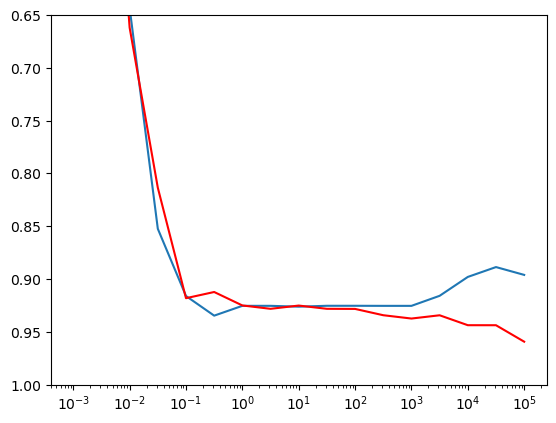

In [27]:
import numpy as np
from sklearn.metrics import f1_score

C = np.logspace(-3, 5, 17)

test, train = [], []
for Ci in C:
    pipe = make_pipeline(StandardScaler(), SVC(C=Ci))
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    test.append(f1_score(y_test, y_pred, average='weighted'))
    y_pred = pipe.predict(X_train)
    train.append(f1_score(y_train, y_pred, average='weighted'))

plt.plot(C, test)
plt.plot(C, train, c='r')
plt.xscale('log')
plt.ylim(1.0, 0.65)

**❓ Do you see a potential issue here?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

Sometimes you will get a lucky test split, sometimes not. This feels a bit aribtrary. And we might overfit this model selection process to the particular test set that we have.

## Cross validation

Instead of choosing a single holdout set for evaluation, we can choose many. This is useful for tuning hyperparameters, for example.

But then we have more ways to leak information into our evaluation, so it is smart to continue to hold out our `val` set.

The other catch is that we now must use a pipeline, otherwise we leak information in the scaling of the data.

Fair evaluation is hard!

But now we can use folded cross-validation in a safe way:

In [28]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer

pipe = make_pipeline(StandardScaler(), SVC(C=0.1))
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_validate(pipe,
               X_train, y_train,
               scoring='f1_weighted',
               cv=skf,
               return_train_score=True,
               # Also useful: groups
              )

{'fit_time': array([0.00586009, 0.00410414, 0.00385189, 0.00411987, 0.00376296]),
 'score_time': array([0.00490999, 0.00390077, 0.00396705, 0.00378704, 0.00354195]),
 'test_score': array([0.88333771, 0.87925205, 0.91299647, 0.85130495, 0.85487836]),
 'train_score': array([0.9210457 , 0.88529379, 0.87967101, 0.89122459, 0.89544211])}

Notice that we no longer use `test` during the model fitting process.

### EXERCISE

Use cross-validation in the loop over values of `C`. Start with:

    C = np.logspace(-3, 5, 17)
    mean_val, mean_train = [], []
    for Ci in C:
        # Instantiate the pipeline, making you set `C=Ci`.
        # Do the cross validation model fits with `cross_validate()`.
        # Gather the means of the test and train scores.

Then make the plot, as before.

(1.0, 0.75)

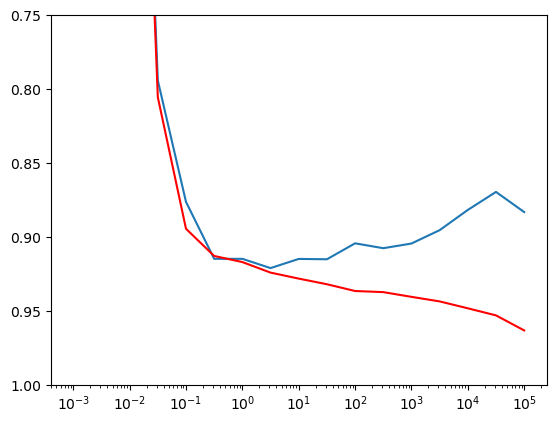

In [29]:
mean_val, mean_train = [], []
for Ci in C:
    pipe = make_pipeline(StandardScaler(), SVC(C=Ci))
    cross_val = cross_validate(pipe, X_train, y_train, scoring='f1_weighted', cv=skf, return_train_score=True)
    mean_val.append(np.mean(cross_val['test_score']))
    mean_train.append(np.mean(cross_val['train_score']))

plt.plot(C, mean_val)
plt.plot(C, mean_train, c='r')
plt.xscale('log')
plt.ylim(1, 0.75)

## Explore the model zoo!

### EXERCISE

- Add `Vs` (shear velocity) to the features and see if it improves the prediction quality.
- Choose another algorithm to try a prediction with, and implement it in a pipeline.
- Choose a hyperparameter of the new algorithm and tune it. (If you have done this kind of thing before, try tuning 2 or 3 hyperparameters with grid or random search.)

## Test

When you have tuned the predictor and are satisfied that it is as good as it can be, you can test your prediction power.

In [30]:
C_opt = C[np.argmax(mean_val)]
C_opt

3.1622776601683795

In [31]:
pipe = make_pipeline(StandardScaler(), SVC(C=C_opt))

pipe.fit(X_train, y_train)
                    
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    dolomite       0.90      0.94      0.92        47
   limestone       1.00      1.00      1.00         4
       shale       0.94      0.91      0.93        56

    accuracy                           0.93       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.93      0.93      0.93       107



If you are satisfied (think hard about what this means... you really have to decide before you start the model fitting process) then you are ready to fit the final model. If not, you must start all over again.

## Using this model

We do not want to use this model &mdash; if we like its performance then we should now retrain it on all the data. Presumably, this new model will be at least as good as the one trained on the training set, we just don't have a way to check it now 😬

In [32]:
scaler = StandardScaler().fit(X)
X_ = scaler.transform(X)
svc = SVC(C=C_opt).fit(X_, y)

There is no way for us to test this model, but we should monitor it in production.

---
&copy; 2025 Matt Hall / Equinor CC BY